In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = data.drop('target', axis=1)
y = data['target']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
input_shape = X_train.shape[1]
input_shape

13

### Build a model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Training

We are saving the training process to a variable named `history` because TF maintains a `History` object to keep track of specified values such as `accuracy`, `loss`, etc. We can also utilize this to plot our training process.

In [13]:
epochs = 200
batch_size = 10

history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=epochs, batch_size=batch_size)

Epoch 1/200
20/20 [==============================] - 1s 10ms/step - loss: 29.0412 - accuracy: 0.4275 - val_loss: 6.8904 - val_accuracy: 0.4286
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 5.9142 - accuracy: 0.4238 - val_loss: 2.3264 - val_accuracy: 0.4286
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.7945 - accuracy: 0.4421 - val_loss: 0.6719 - val_accuracy: 0.4286
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.5018 - val_loss: 0.6462 - val_accuracy: 0.4694
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6032 - val_loss: 0.6425 - val_accuracy: 0.6939
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6369 - val_loss: 0.6313 - val_accuracy: 0.6939
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6274 - val_loss: 0.6435 - val_accuracy: 0.6735
Epoch 8/200

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8689


[0.38791587948799133, 0.868852436542511]

### Plotting training history

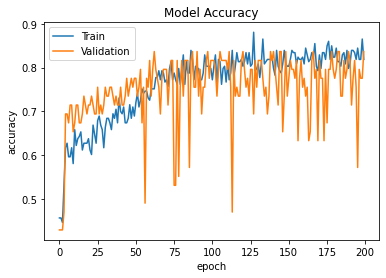

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

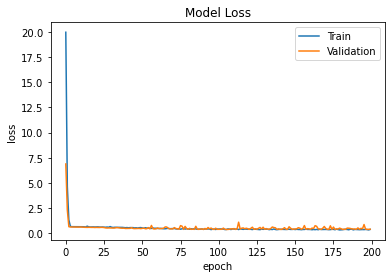

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()